In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve,recall_score
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('american_bankruptcy.csv')
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [4]:
df=df.drop(columns=['company_name','year'])

In [5]:
df.head()

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,alive,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  78682 non-null  object 
 1   X1            78682 non-null  float64
 2   X2            78682 non-null  float64
 3   X3            78682 non-null  float64
 4   X4            78682 non-null  float64
 5   X5            78682 non-null  float64
 6   X6            78682 non-null  float64
 7   X7            78682 non-null  float64
 8   X8            78682 non-null  float64
 9   X9            78682 non-null  float64
 10  X10           78682 non-null  float64
 11  X11           78682 non-null  float64
 12  X12           78682 non-null  float64
 13  X13           78682 non-null  float64
 14  X14           78682 non-null  float64
 15  X15           78682 non-null  float64
 16  X16           78682 non-null  float64
 17  X17           78682 non-null  float64
 18  X18           78682 non-nu

In [7]:
df.shape

(78682, 19)

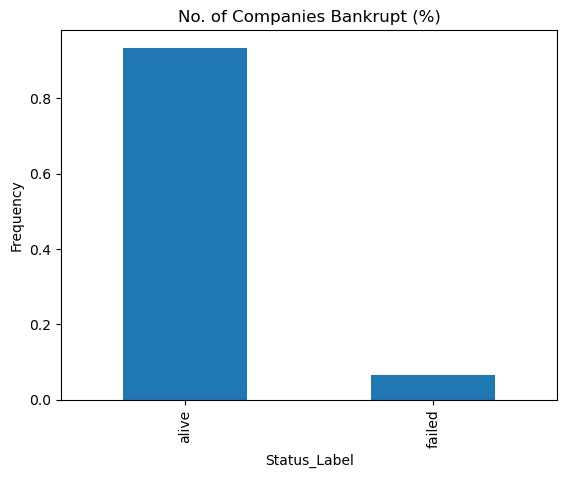

In [8]:
df['status_label'].value_counts(normalize=True).plot(kind='bar',xlabel='Status_Label', ylabel='Frequency', title='No. of Companies Bankrupt (%)');

# Model 5
# Random Forest

In [10]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
        'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
y = df['status_label'].map({'alive': 1, 'failed': 0})

In [11]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (78682, 18)
y shape: (78682,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62945, 18)
y_train shape: (62945,)
X_test shape: (15737, 18)
y_test shape: (15737,)


In [13]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.934


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = rf_classifier.predict(X_test_scaled)
y_pred_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy,4))

0.9364


In [18]:
precision = precision_score(y_test, y_pred)
print(round(precision,4))

0.9364


In [19]:
recall = recall_score(y_test, y_pred,average=None)
print(recall[1])

0.9996591451360011


In [20]:
f1 = f1_score(y_test, y_pred,average=None)
print(f1[1])

0.9669952850407201


In [21]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(round(roc_auc,4))

0.8541


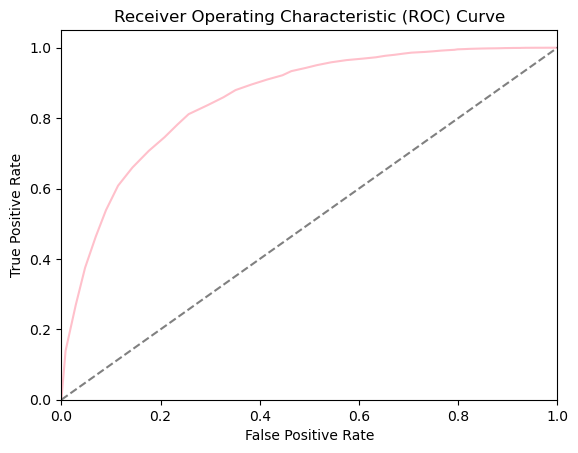

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='pink')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [23]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance.head(10))


Feature Importance:
   Feature  Importance
7       X8    0.068793
14     X15    0.063647
2       X3    0.061815
0       X1    0.059912
12     X13    0.058595
6       X7    0.058477
16     X17    0.058051
9      X10    0.057179
5       X6    0.056913
13     X14    0.055152


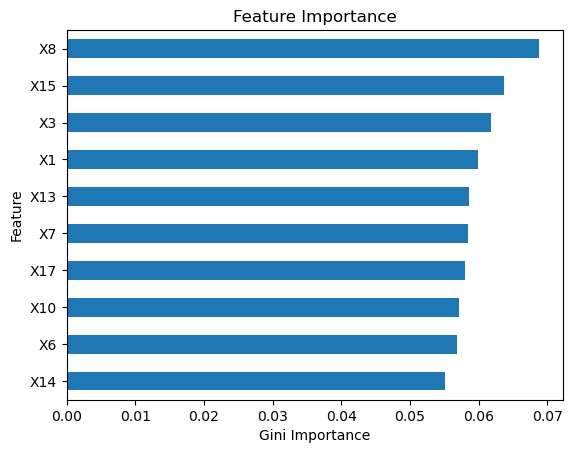

In [24]:
features = X.columns
importances = rf_classifier.feature_importances_

feat_imp = pd.Series(importances, features).sort_values()

feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()